__1.- Explica que fan les següents comandes:__
* tracert $\rightarrow $ Tracert (también conocido como "traceroute") es una herramienta de diagnóstico de red que se utiliza para rastrear la ruta que toma un paquete de datos desde el origen hasta su destino en una red de computadoras. Al utilizar tracert, se pueden identificar los puntos de congestión, retrasos o pérdida de paquetes en la red, lo que ayuda a los administradores de red a solucionar problemas y optimizar el rendimiento de la red. Tracert logra esto enviando paquetes de datos a través de la red y registrando el tiempo que tarda cada salto en la ruta. Esta información se presenta al usuario en forma de una lista de saltos, mostrando la dirección IP y el tiempo de respuesta de cada nodo en la ruta.


* ipconfig /release  $\rightarrow $comando de la línea de comandos de Windows que se utiliza para liberar la dirección IP asignada a una interfaz de red. Al ejecutar este comando, el sistema operativo Windows libera la dirección IP actualmente asignada a la interfaz de red, lo que significa que la interfaz ya no estará asociada con esa dirección IP específica.


* ipconfig /renew  $\rightarrow $ comando de la línea de comandos de Windows que se utiliza para renovar la dirección IP asignada a una interfaz de red. Al ejecutar este comando, el sistema operativo Windows envía una solicitud a un servidor DHCP (Protocolo de Configuración Dinámica de Host) para obtener una nueva dirección IP para la interfaz de red especificada.

* arp -a  $\rightarrow $  comando utilizado en sistemas operativos Windows y en sistemas basados en Unix/Linux para mostrar la tabla ARP (Protocolo de Resolución de Direcciones) actual del sistema. La tabla ARP mapea direcciones IP a direcciones MAC (Media Access Control) en una red local.


(1 punt)


__2.- Diferència entre medi i enllaç? Classificació de l’enllaç que podem tenir. (1 punt)__

Medi: És per on viatja la informació que transmetem.

Enllaç: És el conjunt de Transmissor , Receptor i Medi per on es transmet la informació. 

Per tant, l'enllaç inclou el tranmissor i el receptor a més del medi.

*Classificació dels enllaços*
* Directe vs. Indirecte
    * Directe: El senyal es propaga entre emissor i receptor sense dispositius intermitjos que no siguin amplificadors de senyal o repetidors per augmentar la potència
    * Indirecte: El senyal pateix algun tipus de modificació i cal que sigui regenerat
    
* Punt a punt vs. Multipunt
    * Punt a punt: Dos únics equips que comparteixen l’enllaç
    * Multipunt: Diferents equips que comparteixen el mateix enllaç
* En funció del sentit en que viatja la informació
    * Simplex
    * half duplex
    * Duplex o full duplex
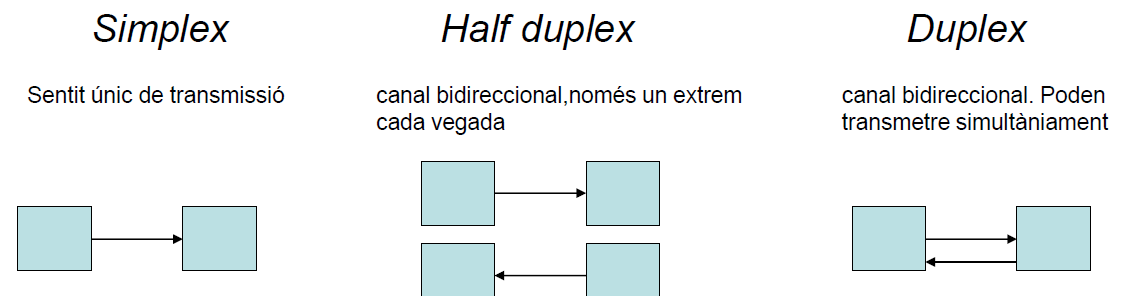

__3.- Què és una adreça MAC? Quin és el número màxim d’adreces MAC que podem tenir en una trama WiFi? Explica el perquè de la necessitat en aquest cas concret. (2 punts)__

L'adreça MAC és un identificador únic de interficie associat a la capa d'enllaç. Normalment té una mida de 48 bits, dividits en 24 bits associats al fabricant i 24 que corresponen al producte. Tots els equips connectats a una xarxa LAN tenen una adreça MAC. 

En una trama WiFi podem tenir 4 adreces MAC diferents:
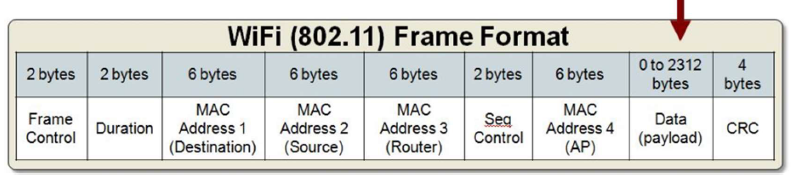
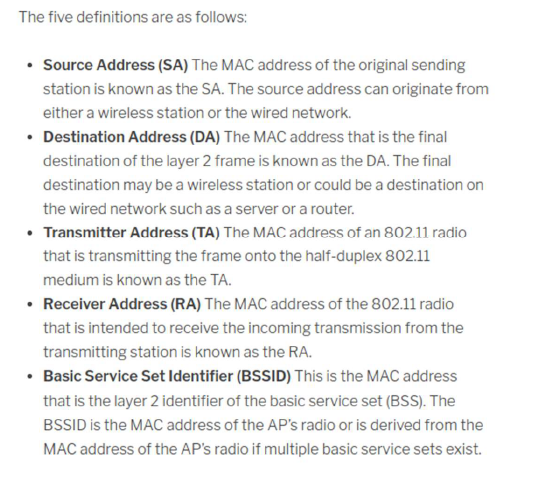


En el cas de necessitar les 4 adreces, tindrem primer el receiver address corresponent al PA del BSS al que enviarem la trama, el segon serà el  transmitter address, corresponent al PA associat al node transmissor. Després tenim la MAC destí i finalment la MAC origen.

4.- La distància entre un emissor i un receptor sense fils és de 1200 metres. Les dades es transmeten a una potència de 10 mWatts, amb una freqüència de portadora de 3GHz i un ample de banda de 1MHz, el guany de les antenes de transmissió i recepció és igual a 0 dB, i el factor de correcció ρ és igual a 0,77.  Si tenim un nivell de soroll N = 2E-11 determina. La potència de recepció en dBm, el valor de SNR, la velocitat màxima a la que poden anar les dades. Calcula el nombre de bits que cal fer servir per aconseguir aquesta velocitat. Quina serà al final la velocitat real considerant el resultat que et dona el valor el nombre de bits? Raona les respostes. (3 punts)

In [2]:
import numpy as np

distancia = 1200 # metres
Ptx = 10 # mWatts
f = 3E9 # portadora
BW = 1E6 # ample de banda
etha  = 0.77
Gtx = 0 # dB
Grx = 0 # dB
N = 2E-11 # soroll en mWatts
long_ona = 3E8/3E9

Prx = Ptx*etha*(long_ona/(4*np.pi*distancia))**2
print("la potencia de recepció és: ", Prx, "mWatts")

la potencia de recepció és:  3.386168029713546e-10 mWatts


In [6]:
Prx_dbm = 10*np.log10(Prx)
print(Prx_dbm, "dBm")

-94.70291494966959 dBm


In [3]:
SNR = 10*np.log10(Prx) - 10*np.log10(N)
print("Relació senyal soroll SNR = ", SNR, "dB")

Relació senyal soroll SNR =  12.286785093690597 dB


In [4]:
S_N = 10**(SNR/10)
print(S_N)

16.930840148567775


In [16]:
# Velocitat màxima segons la llei de Shannon

v_max = BW* np.log2(1+Prx/N)
print(v_max, "bps")

4164371.1820772476 bps


In [19]:
# Numero de bits 
n_bits = v_max/(2*BW)

print(n_bits)
n = int(n_bits)
print("arodonint tenim", n)

2.0821855910386238
arodonint tenim 2


In [20]:
# Per tant la velocitat real serà:
v_real = 2*BW*2
print(v_real, "bps")

4000000.0 bps


__5.- Donada la següent trama de dades 10110111011110001 i el polinomi generador X6+X2+1 calculeu el valor del CRC. (1 punt) Les dades s’envien codificades en bipolar AMI. Com seria aquesta representació? Explica-ho detalladament i explica les tècniques que es fan servir per evitar les pèrdues de sincronisme.(1,5 punts) Quina és la freqüència de portadora d’aquesta codificació? (0,5 punts)__

10110111011110001 000000
1000101
00111101011110001 000000
  1000101
  011111111110001 000000
   1000101
   01110101110001 000000
    1000101
    0110000110001 000000
     1000101
     010010010001 000000
      1000101
      00011000001 000000
         1000101
         01001011 000000
          1000101 000000
          0001110 000000
             1000 101
             0110 101000
              100 0101
              010 111100
               10 00101
               00 110110

10110111011110001 110110

codificació AMI: 

+0-+0-+-0+-+-000+ -+0-+0

Per evitar la pèrdua de sincronisme apliquem dos tècniques:
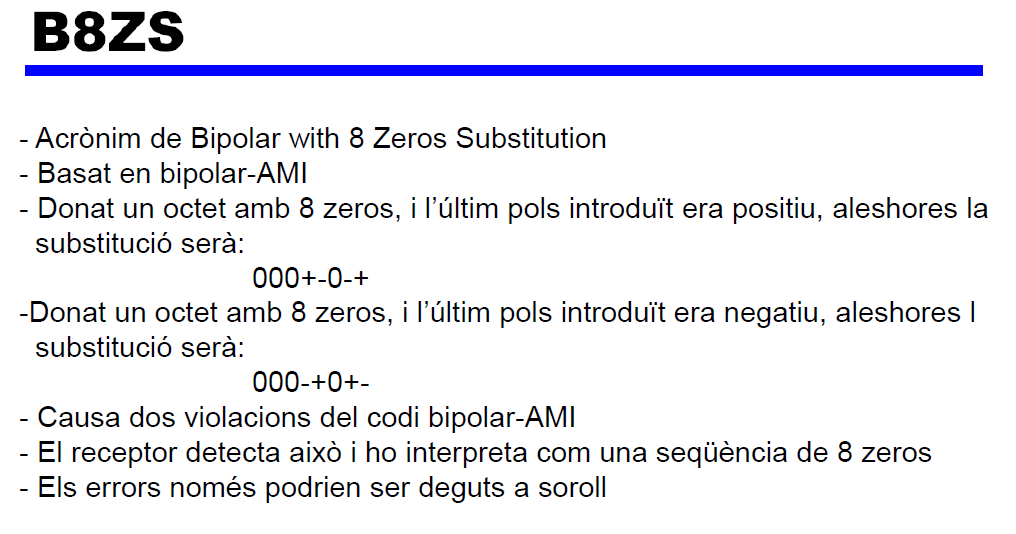
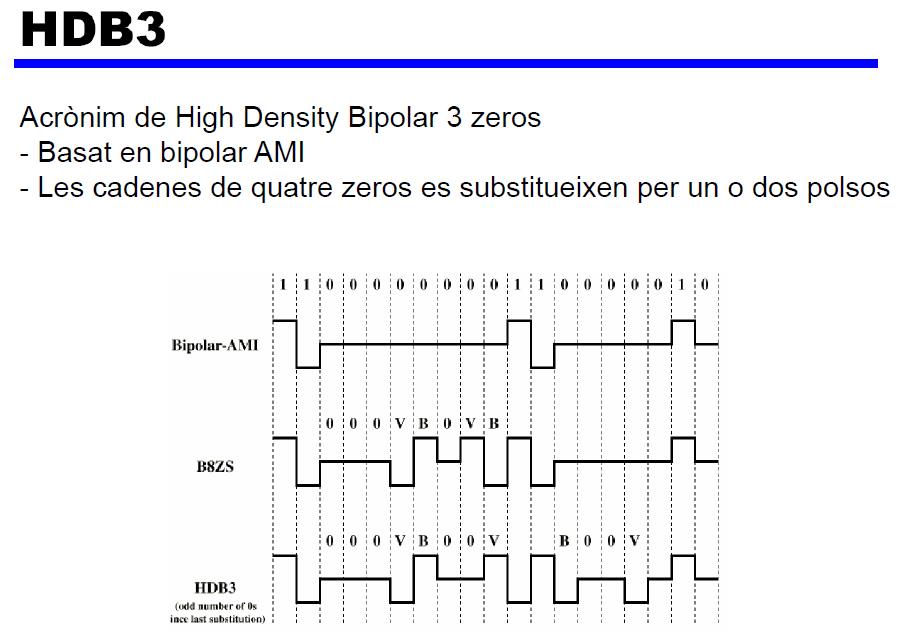

La freqüència de portadora s'aplica en tècniques de modulació, les tècniques de codificació no fan servir freqüència de portadora ja que treballen en banda base.

In [9]:
20*np.log10(0.1/(4800*np.pi))+ 10*np.log10(0.77)+10

-94.7029149496696